In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


# **Heart Failure Prediction**

"*Cardiovascular diseases(CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year. CVDs are group of disorders of the heart and blood vessels include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.*"

--- [World Health Organization](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1)

According to World Health Organization, four out of 5 CVD deaths are due to **heart attacks and srokes**, and one third of these occur prematurely in people under 70 years of age.

The dataset of my project for [Data Analytics with Python: Zero to Pandas](https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas) is Heart **Failure Prediction** which I obtained from the [Kaggle - Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).

This dataset contains 12 features, 299 rows that can be used to predict mortality by heart failure.

Detailed explanation of each feature:

* **age**
* **anaemia** → decrease of red blood cells or hemoglobin (boolean)

> * No : 0
> * Yes : 1

**creatinine_phosphokinase** → Level of the CPK enzyme in the blood (mcg/L)

**diabetes** → if the patient has diabetes (boolean)

> * No: 0
> * Yes : 1

**enjection_fraction** → Percentage of blood leaving the heart ar each contraction (percentage)

**high_blood_pressure** → if the patient has hypertension ( boolean)
> * No : 0
> * Yes : 1

**platelets** → Platelets in the blood (kiloplateletes/mL)

**serum_creatinine** → Level of serum creatinine in the blood (mg/dL)

**serum_sodium** → Level of serum sodium in the blood (mEq/L)

**sex** → Woman or man (binary)
> * Gender of patient Male = 1
> * Gender of patient Female = 0

**smoking** → if the patient smokes or not (boolean)
> * No : 0
> * Yes : 1

**time** → follow-up period (days)

**TARGET:**

> > **death_event** → if the patient deceased during the follow-up period (boolean)
> > * No : 0
> > * Yes : 1

#  **Data Preparation and Cleaning**

In this part, I will load the dataset into a data frame without any changes. In addition to this, I will explore the number of rows and columns, observe the missing data and find a solution to **handle missing data or invalid data**.

In [50]:
#Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import plot,iplot,init_notebook_mode

import plotly.graph_objects as go
# The plotly.graph_objects module (typically imported as go ) contains an automatically-generated hierarchy of 
# Python classes which represent non-leaf nodes in this figure schema. 
# The term "graph objects" refers to instances of these classes.
# https://plotly.com/python/graph-objects/#:~:text=machine%2Dreadable%20form.-,The%20plotly.,to%20instances%20of%20these%20classes.


import plotly.express as px
# The plotly.express module (usually imported as px ) contains functions that can create entire figures at once, 
# and is referred to as Plotly Express or PX. Plotly Express is a built-in part of the plotly library, 
# and is the recommended starting point for creating most common figures.
# https://plotly.com/python/plotly-express/#:~:text=Dash%20Enterprise%20Overview-,Overview,for%20creating%20most%20common%20figures.


import warnings

import lightgbm as lgb
# LightGBM can use categorical features as input directly. 
# It doesn't need to convert to one-hot encoding, and is much faster than one-hot encoding (about 8x speed-up). 
# Note: You should convert your categorical features to int type before you construct Dataset .
# https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
# https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
# LightGBM, short for Light Gradient Boosting Machine, is a free and open source distributed gradient boosting 
# framework for machine learning originally developed by Microsoft.[4][5] It is based on decision tree algorithms 
# and used for ranking, classification and other machine learning tasks. The development focus 
# is on performance and scalability.
# https://en.wikipedia.org/wiki/LightGBM

from IPython.display import HTML 

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [51]:
heart_failure_raw_df = pd.read_csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
heart_failure_raw_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


The dataset contains 288 responses to 13 features.

Let's view the list of columns in the data frame

In [52]:
heart_failure_raw_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [53]:
selected_columns = heart_failure_raw_df.columns
len(selected_columns)

13

Let's extract a copy of the data from these columns into a new data frame **heart_failure_df**, which I can continue to modify further without affection the original data frame.

In [54]:
heart_failure_df = heart_failure_raw_df[selected_columns].copy()
heart_failure_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [55]:
heart_failure_df.shape

(299, 13)

In [56]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [57]:
heart_failure_df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
heart_failure_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

All columns except for age, platelets,serum_creatinine have the data type integer. So, I don't have to convert object values to numeric values.

According to all columns, they don't contain empty values (missing data). So, I don't do anything to handle the missing data.

# **Exploratory Data Analysis (EDA) and Visualization**

Before asking interesting questions, I should understand **which column is so important for hearth failure prediction**. By exploring these variables in order to understand the dataset, I might get the best prediction.

Let's begin by importing matplotlib.pyplot and seaborn

In [59]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

# Matplotlib uses matplotlibrc configuration files to customize all kinds of properties, 
# which we call 'rc settings' or 'rc parameters'
# https://matplotlib.org/stable/tutorials/introductory/customizing.html

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Visualization of Target Column

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

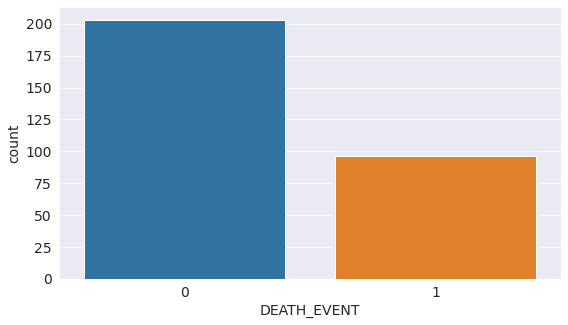

In [60]:
target = heart_failure_df["DEATH_EVENT"]
sns.countplot(heart_failure_df.DEATH_EVENT)

In [61]:
counts = heart_failure_df.DEATH_EVENT.value_counts()
counts

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [62]:
# Getting the count and percentage column by using target column

counts = heart_failure_df.DEATH_EVENT.value_counts()
percentage = heart_failure_df.DEATH_EVENT.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts':counts,'Percentage': percentage})

# With normalize set to True , returns the relative frequency by dividing all values by the sum of values. 
# Bins can be useful for going from a continuous variable to a categorical variable; 
# instead of counting unique apparitions of values, divide the index in the specified number of half-open bins.

,Counts,Percentage
0,203,67.9%
1,96,32.1%


In [63]:
y = heart_failure_df.loc[:,"DEATH_EVENT"]
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [64]:
y_dropped = heart_failure_df.drop("DEATH_EVENT",axis = 1)
y_dropped

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [65]:
X = y_dropped.loc[:,:]
# X = y_dropped
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [66]:
from sklearn.model_selection import train_test_split

# Removing the target column from real dataset
y = heart_failure_df.loc[:,"DEATH_EVENT"]
y_dropped = heart_failure_df.drop("DEATH_EVENT",axis = 1)
X = y_dropped.loc[:,:]

# Data Splitting to determine Feature Importance 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(209, 12) (90, 12) (209,) (90,)


# **Feature Importance without Gain**

Without Gain refers the importance of the features according to the branching of the tree.


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[14]	valid's auc: 0.868689


<AxesSubplot:>

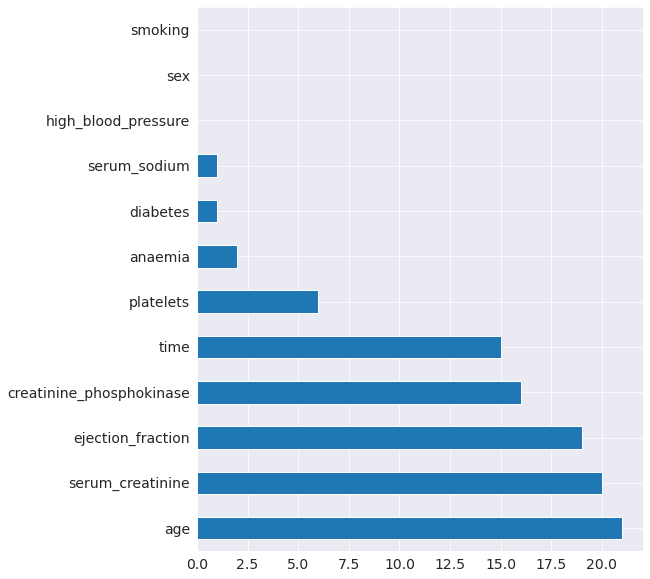

In [67]:
import lightgbm as lgb

# Indicating all specific params
fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }

# n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 1000 define only the absolute maximum
clf = lgb.LGBMClassifier(num_leaves= 15, max_depth=-1, 
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.1)

# force larger number of max trees and smaller learning rate
clf.fit(X_train, y_train, **fit_params)

feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

# **Feature Importance with Gain**

With Gain refers the improtance of the features according to the gain in each brach.

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[14]	valid's auc: 0.868689


<AxesSubplot:>

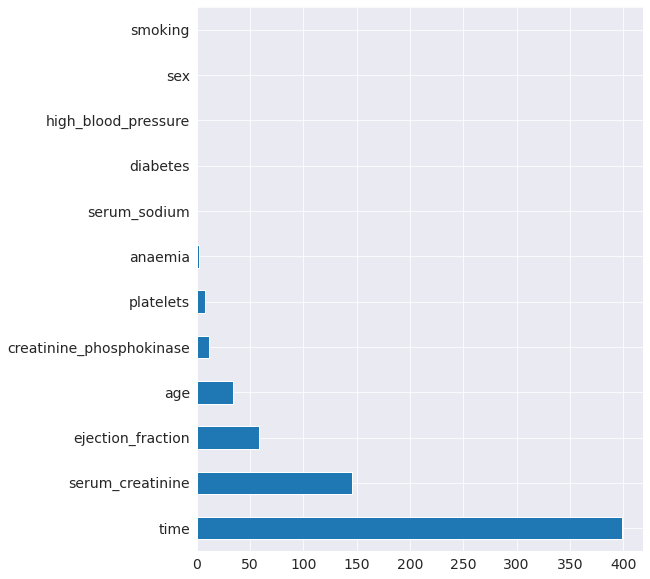

In [68]:
class LGBMClassifier_GainFE(lgb.LGBMClassifier):
    @property 
    # We used @property decorator to give "special" functionality such as deleters to certain methods
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')

clf2 = LGBMClassifier_GainFE(num_leaves= 15, max_depth=-1, 
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.1) 

clf2.fit(X_train, y_train, **fit_params)

feat_imp = pd.Series(clf2.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))


When the 2nd graphic is examined, the features that affect the target column most were determined.

So, I will select only 5 features: time, serum_creatinine, ejection_fraction, age, creatinine_phosphokinase.

# **Analysis of Important Features**

**TIME**

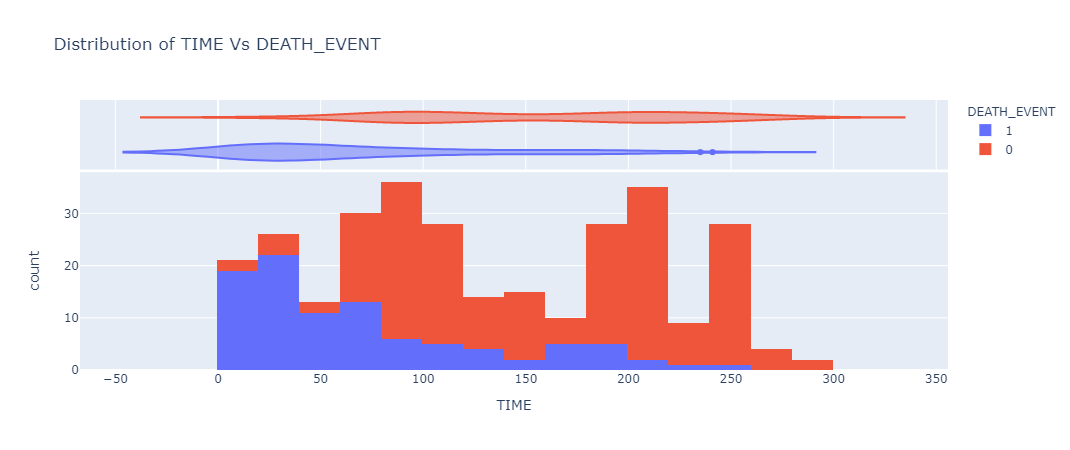

In [69]:
%matplotlib inline
fig = px.histogram(heart_failure_df, x="time", color="DEATH_EVENT", marginal="violin", hover_data=heart_failure_df.columns, 
                   title ="Distribution of TIME Vs DEATH_EVENT", 
                   labels={"time": "TIME"})
fig.show()

**If the follow-up time of a person's heart disease increases, the mortality rate of the heart disease decreases significantly.**

**SERUM CREATININE**

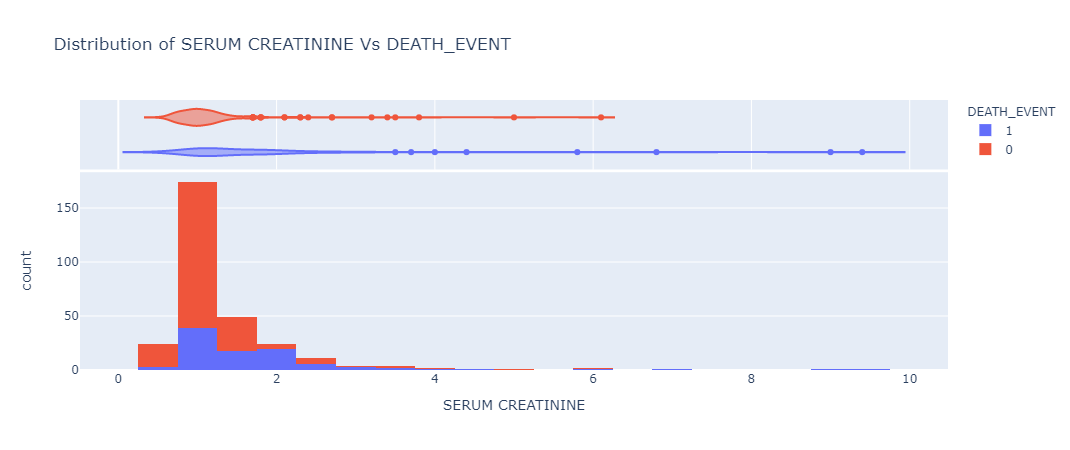

In [70]:
fig = px.histogram(heart_failure_df, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=heart_failure_df.columns, 
                   title ="Distribution of SERUM CREATININE Vs DEATH_EVENT", 
                   labels={"serum_creatinine": "SERUM CREATININE"})
fig.show()

When the level of serum creatinine in the blood is between 0 and 2 mg/dL, it is observed that the patient's survival rates is higher than the death rate.

**EJECTION FRACTION**

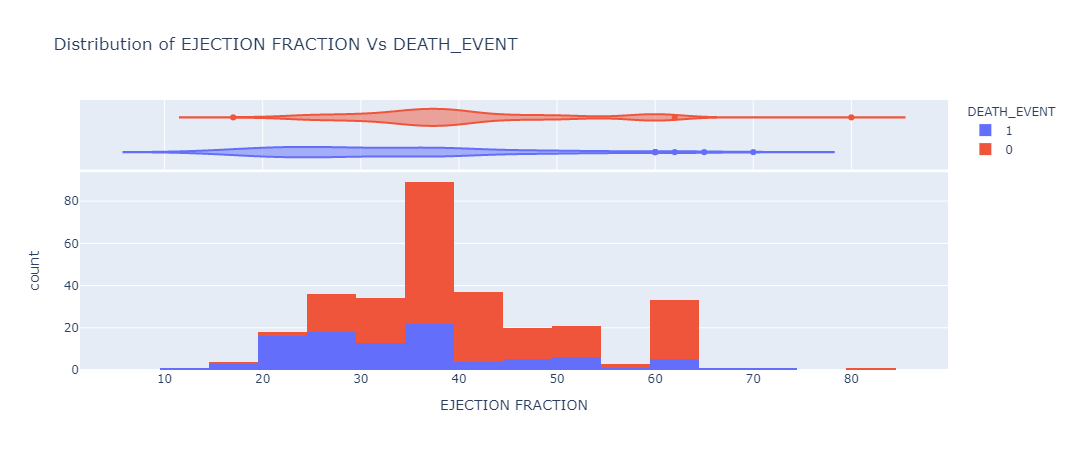

In [71]:
fig = px.histogram(heart_failure_df, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=heart_failure_df.columns, 
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"})
fig.show()

**AGE**

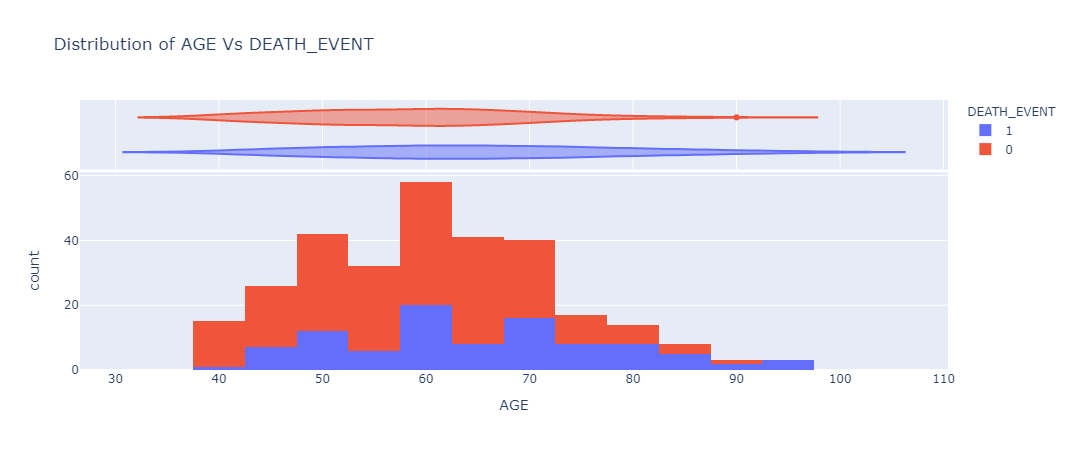

In [72]:
fig = px.histogram(heart_failure_df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=heart_failure_df.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"})
fig.show()


A person between the ages of 40 and 70 is more likely to survive.

**CREATININE PHOSPHOKINASE**

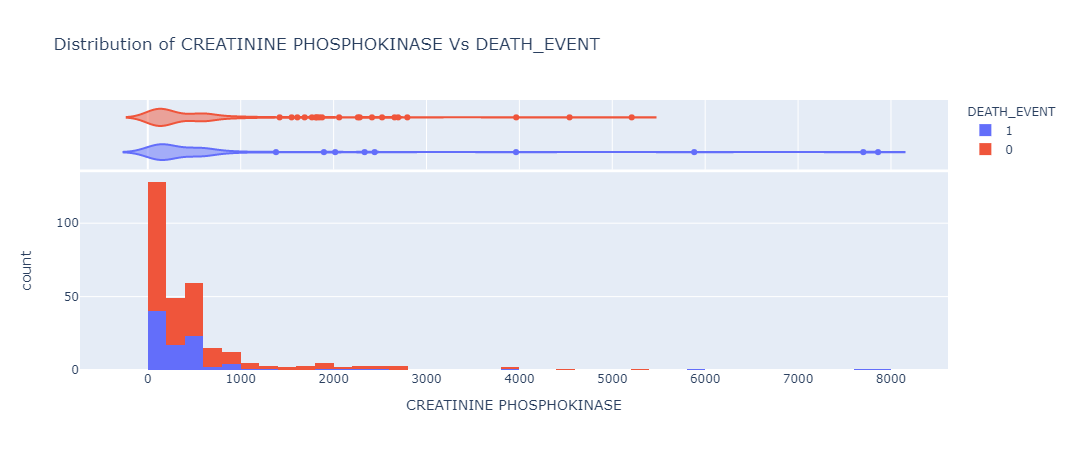

In [73]:
fig = px.histogram(heart_failure_df, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=heart_failure_df.columns, 
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT", 
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"})
fig.show()

In [74]:
heart_failure_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [75]:
heart_failure_df[["sex","diabetes","smoking","anaemia","high_blood_pressure","DEATH_EVENT"]]

,sex,diabetes,smoking,anaemia,high_blood_pressure,DEATH_EVENT
0,1,0,0,0,1,1
1,1,0,0,0,0,1
2,1,0,1,0,0,1
3,1,0,0,1,0,1
4,0,1,0,1,0,1
...,...,...,...,...,...,...
294,1,1,1,0,1,0
295,0,0,0,0,0,0
296,0,1,0,0,0,0
297,1,0,1,0,0,0


In [76]:
heart_failure_df.groupby(["sex","diabetes","smoking","anaemia","high_blood_pressure","DEATH_EVENT"])

In [77]:
heart_failure_df.groupby(["sex","diabetes","smoking","anaemia","high_blood_pressure","DEATH_EVENT"])["age"]

In [78]:
heart_failure_df.groupby(["sex","diabetes","smoking","anaemia","high_blood_pressure","DEATH_EVENT"])["age"].count()

sex  diabetes  smoking  anaemia  high_blood_pressure  DEATH_EVENT
0    0         0        0        0                    0              10
                                                      1               5
                                 1                    0               8
                                                      1               2
                        1        0                    0              11
                                                      1               2
                                 1                    0               6
                                                      1               4
               1        0        1                    0               1
                        1        1                    1               1
     1         0        0        0                    0              14
                                                      1               3
                                 1                    0               

In [79]:
sun = heart_failure_df.groupby(["sex","diabetes","smoking","anaemia","high_blood_pressure","DEATH_EVENT"])["age"].count().reset_index()
sun.columns= ["sex","diabetes","smoking","anaemia","high_blood_pressure","DEATH_EVENT", "count"]
sun

,sex,diabetes,smoking,anaemia,high_blood_pressure,DEATH_EVENT,count
0,0,0,0,0,0,0,10
1,0,0,0,0,0,1,5
2,0,0,0,0,1,0,8
3,0,0,0,0,1,1,2
4,0,0,0,1,0,0,11
5,0,0,0,1,0,1,2
6,0,0,0,1,1,0,6
7,0,0,0,1,1,1,4
8,0,0,1,0,1,0,1
9,0,0,1,1,1,1,1


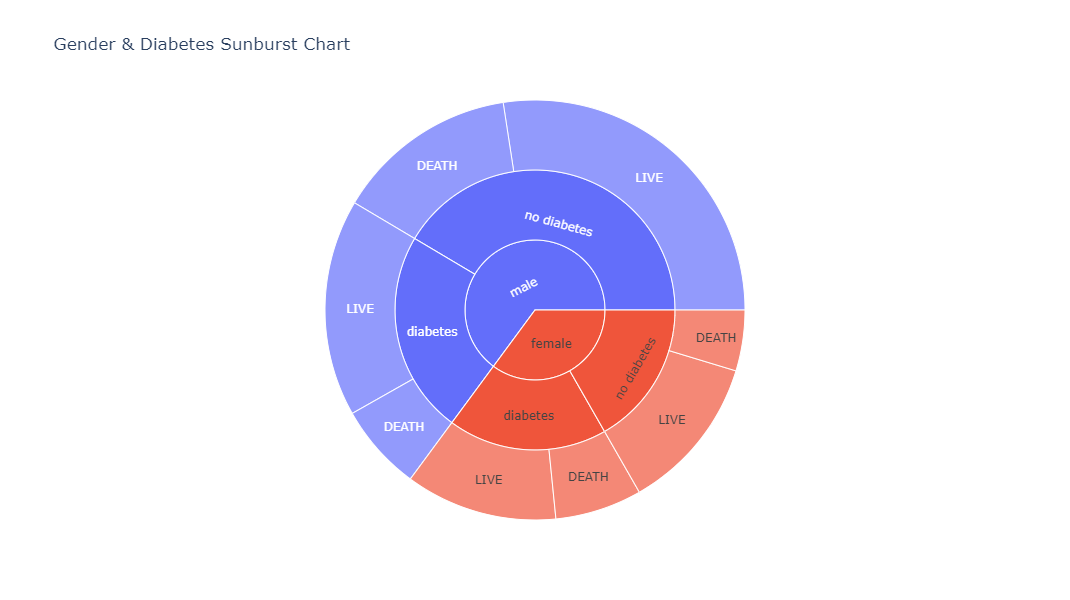

In [80]:
sun.loc[sun["sex"]== 0 , "sex"] = "female"
sun.loc[sun["sex"]== 1, "sex"] = "male"

sun.loc[sun["diabetes"]== 0 , "diabetes"] = "no diabetes"
sun.loc[sun["diabetes"]== 1, "diabetes"] = "diabetes"

sun.loc[sun['DEATH_EVENT'] == 0,'DEATH_EVENT'] = "LIVE"
sun.loc[sun['DEATH_EVENT'] == 1, 'DEATH_EVENT'] = 'DEATH'

fig = px.sunburst(sun, 
                  path=["sex","diabetes","DEATH_EVENT"],
                  values="count",
                  title="Gender & Diabetes Sunburst Chart ",
                  width=600,
                  height=600)

fig.show()

Whether the patient are diabetic or not, the survival rate is higher than the death rate.



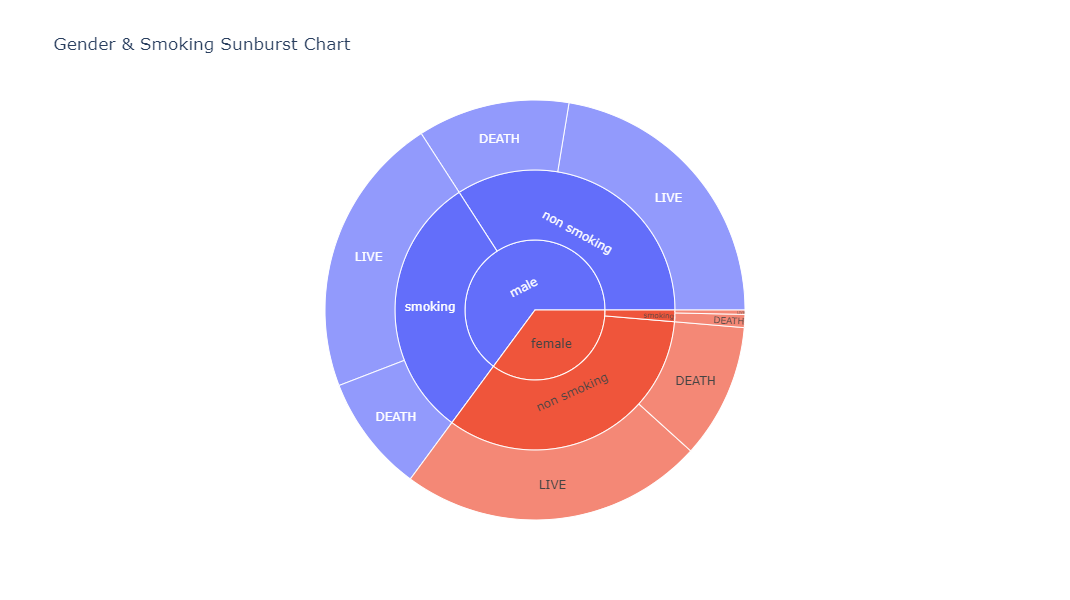

In [81]:
sun.loc[sun["smoking"]== 0 , "smoking"] = "non smoking"
sun.loc[sun["smoking"]== 1, "smoking"] = "smoking"

fig = px.sunburst(sun, 
                  path=["sex","smoking","DEATH_EVENT"],
                  values="count",
                  title="Gender & Smoking Sunburst Chart ",
                  width=600,
                  height=600)

fig.show()

**Whether a patient is a smoker or not, the survival rate is higher than the death rate. However, that does not mean it carries no risk.**

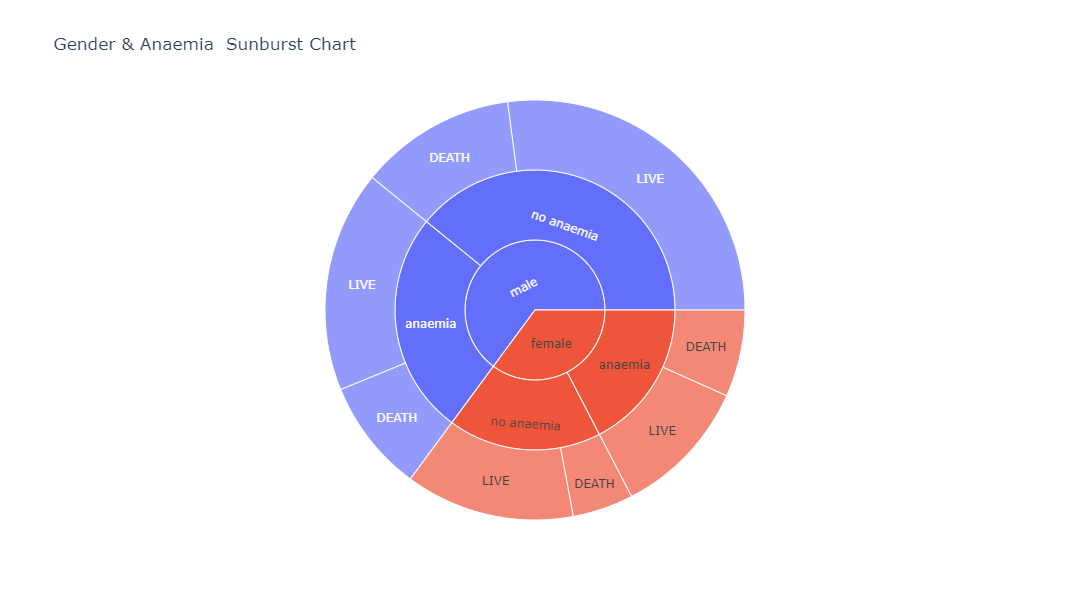

In [82]:
sun.loc[sun["anaemia"]== 0 , "anaemia"] = "no anaemia"
sun.loc[sun["anaemia"]== 1, "anaemia"] = "anaemia"

fig = px.sunburst(sun, 
                  path=["sex","anaemia","DEATH_EVENT"],
                  values="count",
                  title="Gender & Anaemia  Sunburst Chart ",
                  width=600,
                  height=600)

fig.show()

**Whether the patient has anaemia or not, the survival rate is higher than the death rate.**

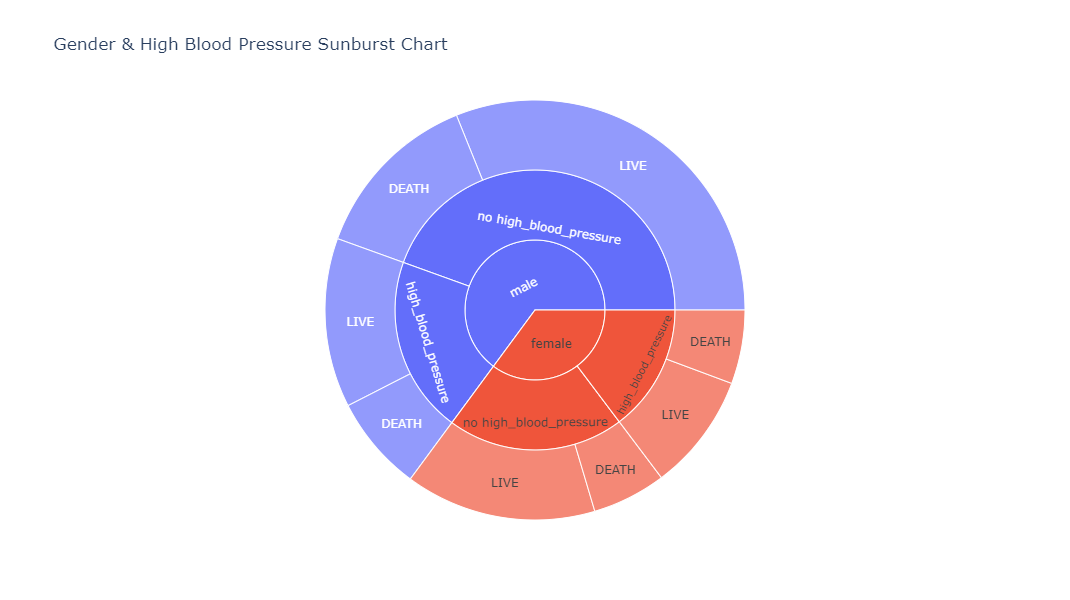

In [83]:
sun.loc[sun["high_blood_pressure"]== 0 , "high_blood_pressure"] = "no high_blood_pressure"
sun.loc[sun["high_blood_pressure"]== 1, "high_blood_pressure"] = "high_blood_pressure"

fig = px.sunburst(sun, 
                  path=["sex","high_blood_pressure","DEATH_EVENT"],
                  values="count",
                  title="Gender & High Blood Pressure Sunburst Chart ",
                  width=600,
                  height=600)

fig.show()

Whether the patient has high blood pressure or not, the survival rate is higher than the death rate.

Let us save and upload our work to Jovian before continuing

# **Asking and Answering Questions**

So far I have observed how different features are related together. I will now look for answers by asking questions about how these features together affect the deadth event.

**Q1: How does age and gender difference affect the mortality rate of the heart disase?**

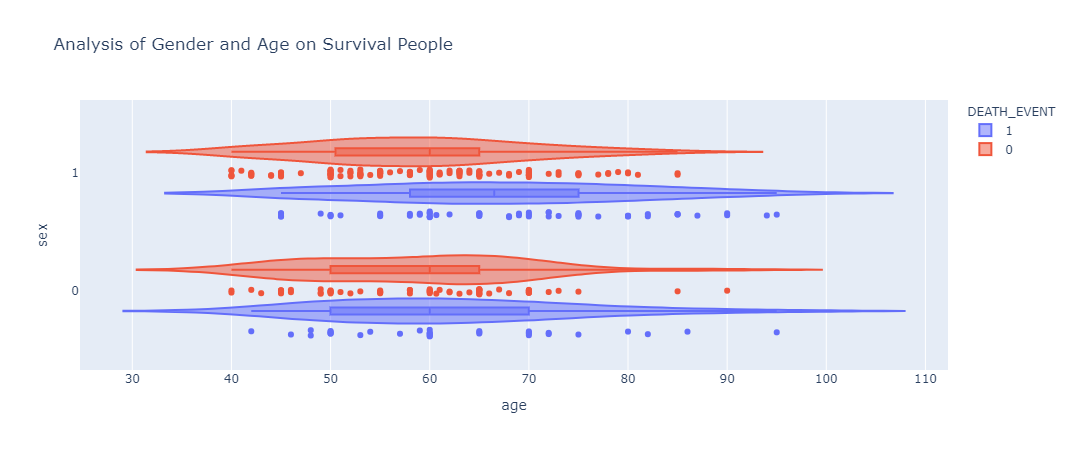

In [84]:
fig = px.violin(heart_failure_df, x="age",y="sex", color="DEATH_EVENT",
                box=True,points="all",hover_data=heart_failure_df.columns,
                title="Analysis of Gender and Age on Survival People",
                orientation="h")

fig.show()


Gender : Male = 1, Female = 0

DEATH_EVENT : Death = 1, Live = 0

------------------------------------

When I look at the violin graph, the patients have a higher chance of survival between the ages of 40 and 70.

The survival rate is high for both male and female between 50 to 65.

**Q2: How does the person's smoking or non-smoking, as well as age and gender difference affect the mortality rate of the heart disase?**

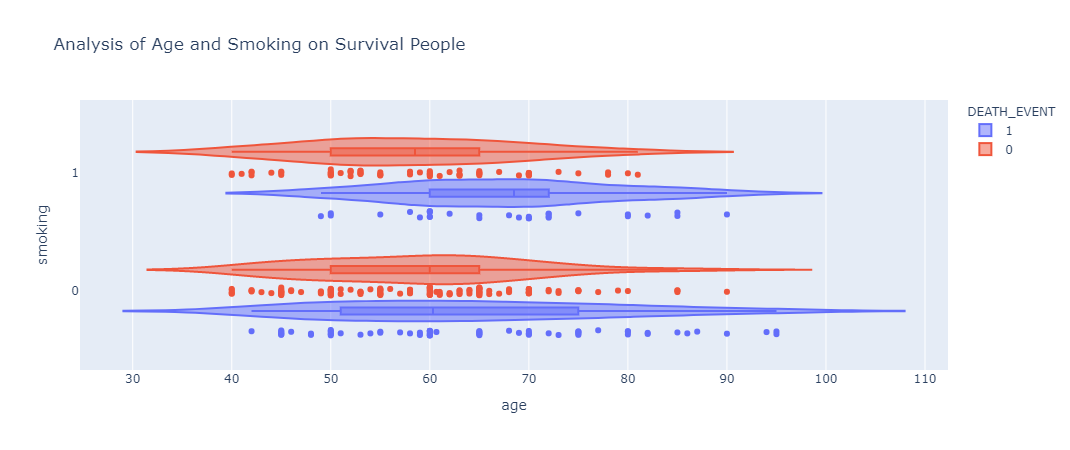

In [85]:
fig = px.violin(heart_failure_df, x="age",y="smoking", color="DEATH_EVENT",
                box=True,points="all",hover_data=heart_failure_df.columns,
                title="Analysis of Age and Smoking on Survival People",
                orientation="h")
fig.show()

Smoking : Smoking = 1, Non Smoking = 0

DEATH_EVENT : Death = 1, Live = 0

--------------------------------------

When I look at the violin graph, the patients who are non smoking have a higher chance of survival between the ages of 50 and 65. On the other hand, the patients who are smoking have change of survival between the ages 50 to 60.

Death event for smoking person is higher than non smoking person.

In [88]:
heart_failure_df["sex"][heart_failure_df["smoking"]==1]

2      1
5      1
7      1
9      1
10     1
      ..
292    1
293    1
294    1
297    1
298    1
Name: sex, Length: 96, dtype: int64

In [89]:
heart_failure_df["DEATH_EVENT"][heart_failure_df["smoking"]==1]

2      1
5      1
7      1
9      1
10     1
      ..
292    0
293    0
294    0
297    0
298    0
Name: DEATH_EVENT, Length: 96, dtype: int64

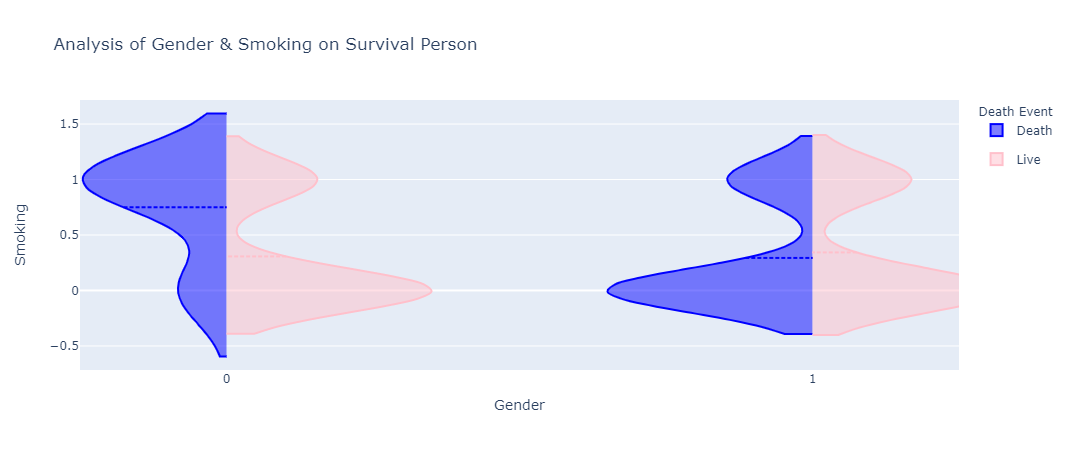

In [90]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Violin(x=heart_failure_df["sex"][heart_failure_df["smoking"]==1],
                        y=heart_failure_df["DEATH_EVENT"][heart_failure_df["smoking"]==1],
                        legendgroup=1, scalegroup=1,name="Death",
                        side="negative",line_color="blue"))

fig.add_trace(go.Violin(x=heart_failure_df["sex"][heart_failure_df["smoking"]==0],
                        y=heart_failure_df["DEATH_EVENT"][heart_failure_df["smoking"]==0],
                        legendgroup=0, scalegroup=0,name="Live",
                        side="positive",line_color="pink"))



fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0,violinmode="overlay",
                  title= "Analysis of Gender & Smoking on Survival Person",
                  xaxis_title="Gender",
                  yaxis_title="Smoking",
                  legend_title="Death Event")
fig.show()

Gender : Male = 1, Female = 0

Smoking : Smoking = 1, Non Smoking = 0

DEATH_EVENT : Death = 1, Live = 0

-----------------------------

When I look at the violin graph, the mortality rate for male smoking person is higher than female smoking person. The mortality rate for male non smoking person is higher than female smoking person. The survival rate for both of them(female & male) are equal each other.

**Q3: How does the person's diabetes or not, as well as age and gender difference affect the mortality rate of the heart disase?**

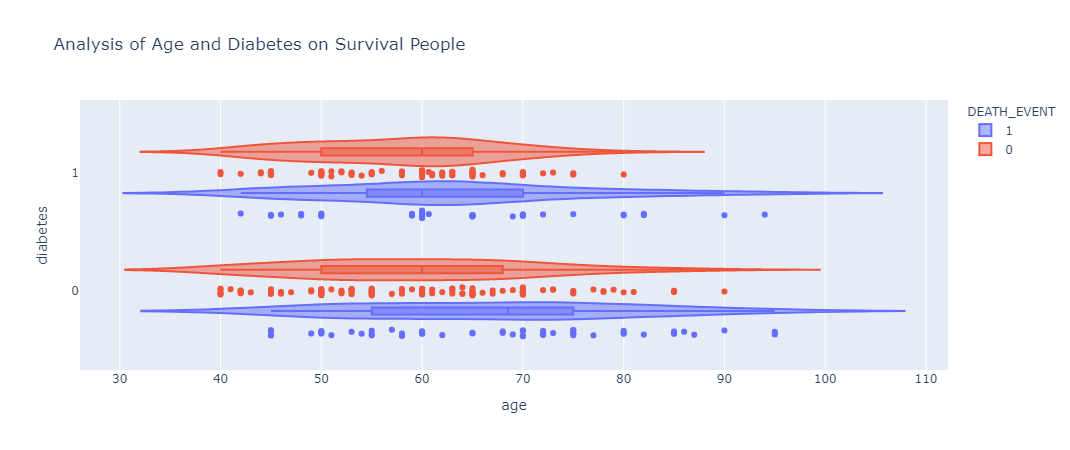

In [91]:
fig = px.violin(heart_failure_df, x="age",y="diabetes", color="DEATH_EVENT",
                box=True,points="all",hover_data=heart_failure_df.columns,
                title="Analysis of Age and Diabetes on Survival People",
                orientation="h")
fig.show()

Diabetes : Diabets = 1, No Diabetes = 0

DEATH_EVENT : Death = 1, Live = 0

----------------

When I look at the violin graph, the patients who are not diabetes have a higher chance of survival between the ages of 50 and 65. On the other hand, the patients who are diabetes have change of survival between the ages 50 to 65.

Death event for diabetes person is higher than no diabetes person.

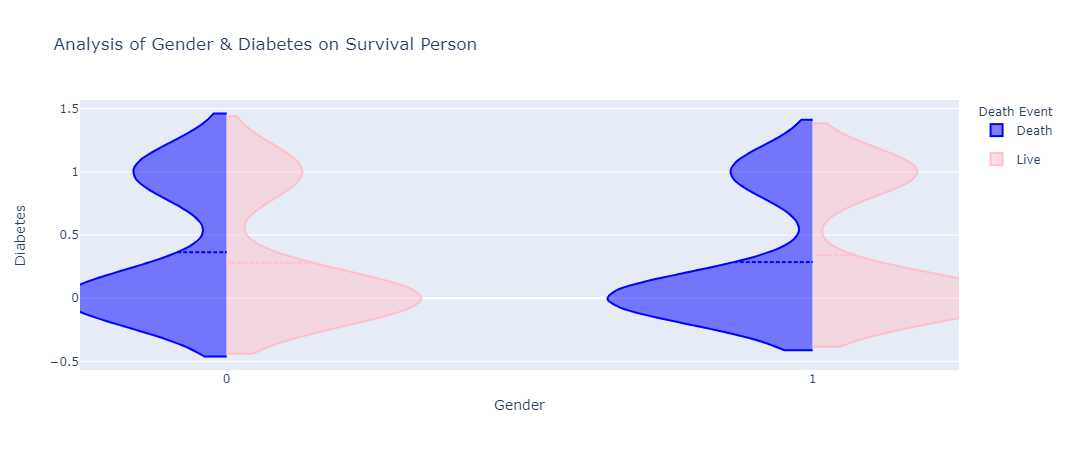

In [92]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Violin(x=heart_failure_df["sex"][heart_failure_df["diabetes"]==1],
                        y=heart_failure_df["DEATH_EVENT"][heart_failure_df["diabetes"]==1],
                        legendgroup=1, scalegroup=1,name="Death",
                        side="negative",line_color="blue"))

fig.add_trace(go.Violin(x=heart_failure_df["sex"][heart_failure_df["diabetes"]==0],
                        y=heart_failure_df["DEATH_EVENT"][heart_failure_df["diabetes"]==0],
                        legendgroup=0, scalegroup=0,name="Live",
                        side="positive",line_color="pink"))



fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0,violinmode="overlay",
                  title= "Analysis of Gender & Diabetes on Survival Person",
                  xaxis_title="Gender",
                  yaxis_title="Diabetes",
                  legend_title="Death Event")
fig.show()

Diabetes : Diabetes = 1, No Diabetes = 0

Gender : Male = 1 , Female = 0

DEATH_EVENT : Death = 1, Live = 0

------

The survival and mortality rate for both of them(female & male) are approximately equal to each other. People who have diabetes don't affect the mortlality rate as much as people who don't have diabetes.

**Q4: How does the person's anaemia or not, as well as age and gender difference affect the mortality rate of the heart disase?**

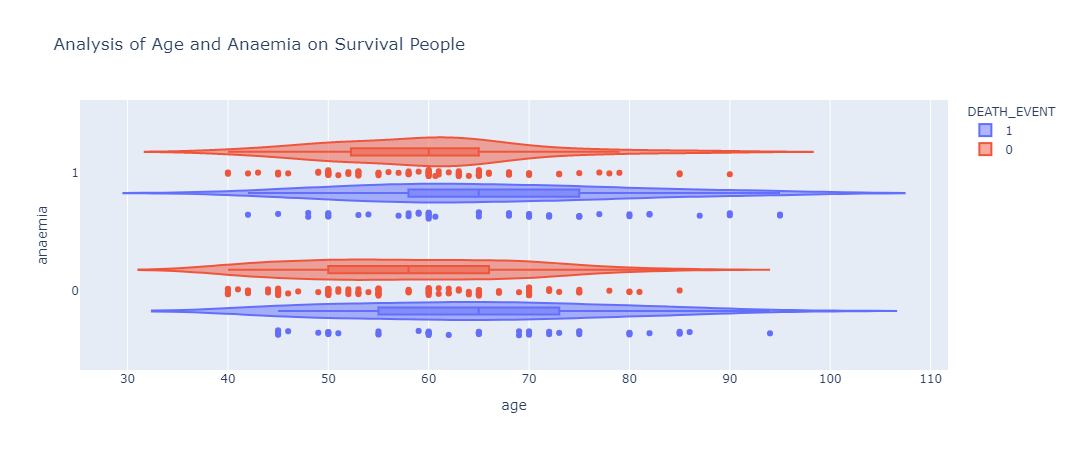

In [93]:
fig = px.violin(heart_failure_df, x="age",y="anaemia", color="DEATH_EVENT",
                box=True,points="all",hover_data=heart_failure_df.columns,
                title="Analysis of Age and Anaemia on Survival People",
                orientation="h")
fig.show()

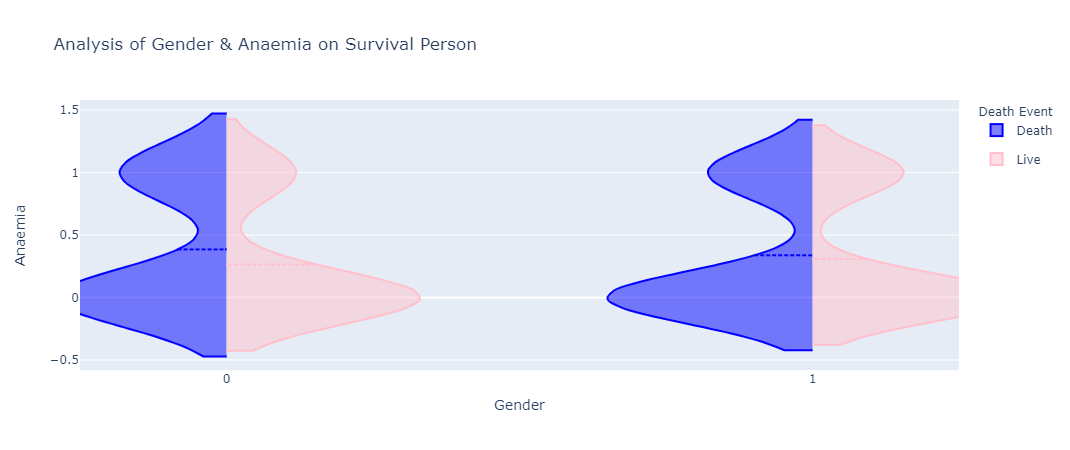

In [94]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Violin(x=heart_failure_df["sex"][heart_failure_df["anaemia"]==1],
                        y=heart_failure_df["DEATH_EVENT"][heart_failure_df["anaemia"]==1],
                        legendgroup=1, scalegroup=1,name="Death",
                        side="negative",line_color="blue"))

fig.add_trace(go.Violin(x=heart_failure_df["sex"][heart_failure_df["anaemia"]==0],
                        y=heart_failure_df["DEATH_EVENT"][heart_failure_df["anaemia"]==0],
                        legendgroup=0, scalegroup=0,name="Live",
                        side="positive",line_color="pink"))



fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0,violinmode="overlay",
                  title= "Analysis of Gender & Anaemia on Survival Person",
                  xaxis_title="Gender",
                  yaxis_title="Anaemia",
                  legend_title="Death Event")
fig.show()

**Q5: How does the person's high blood pressure or not, as well as age and gender difference affect the mortality rate of the heart disase?**

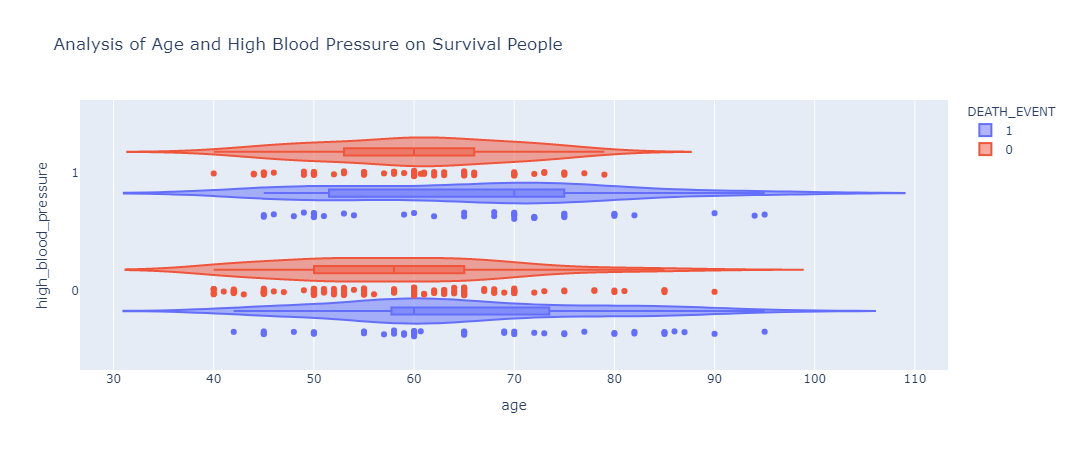

In [95]:
fig = px.violin(heart_failure_df, x="age",y="high_blood_pressure", color="DEATH_EVENT",
                box=True,points="all",hover_data=heart_failure_df.columns,
                title="Analysis of Age and High Blood Pressure on Survival People",
                orientation="h")
fig.show()

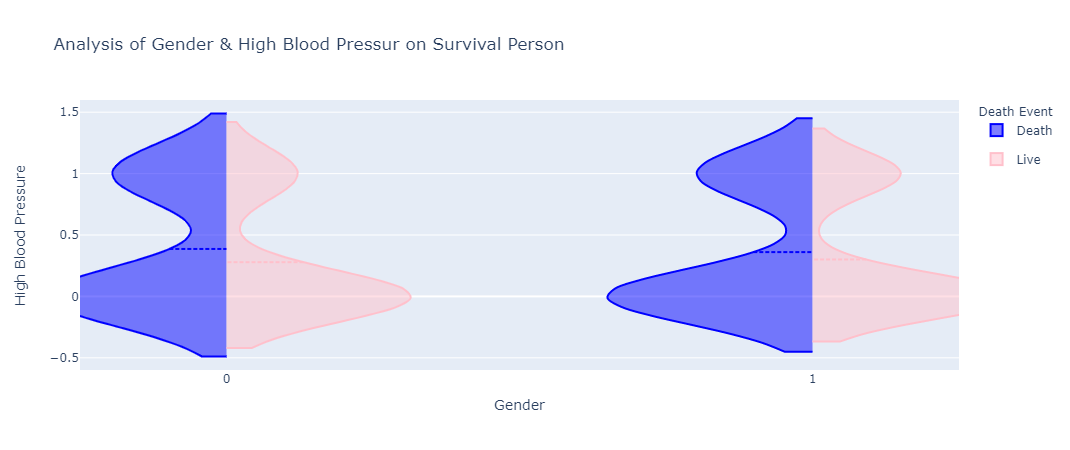

In [96]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Violin(x=heart_failure_df["sex"][heart_failure_df["high_blood_pressure"]==1],
                        y=heart_failure_df["DEATH_EVENT"][heart_failure_df["high_blood_pressure"]==1],
                        legendgroup=1, scalegroup=1,name="Death",
                        side="negative",line_color="blue"))

fig.add_trace(go.Violin(x=heart_failure_df["sex"][heart_failure_df["high_blood_pressure"]==0],
                        y=heart_failure_df["DEATH_EVENT"][heart_failure_df["high_blood_pressure"]==0],
                        legendgroup=0, scalegroup=0,name="Live",
                        side="positive",line_color="pink"))



fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0,violinmode="overlay",
                  title= "Analysis of Gender & High Blood Pressur on Survival Person",
                  xaxis_title="Gender",
                  yaxis_title="High Blood Pressure",
                  legend_title="Death Event")
fig.show()

**Q6: Why do anaemia, high blood pressure, diabetes, gender and smoking affect death events so little?**

Before that, let's see the results table of the features that affect the death event most. Anywhere you see in blue refers to the survivor, which I found that the following features had a great impact on the death event

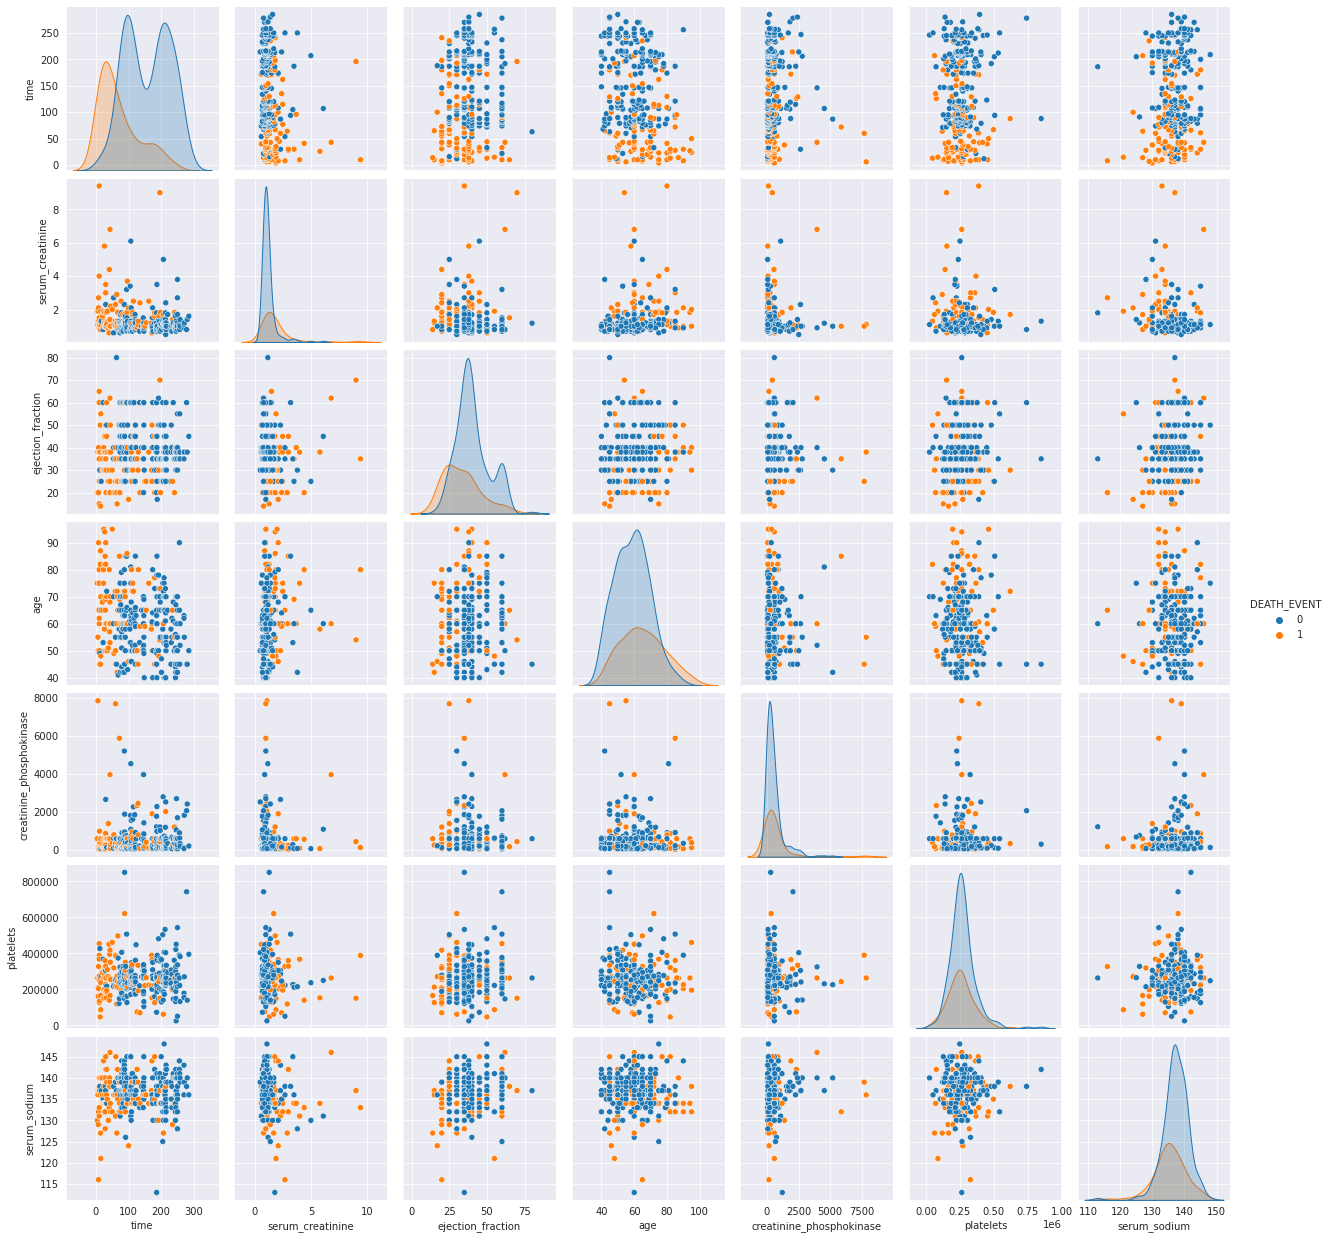

In [97]:
sns.pairplot(heart_failure_df,hue="DEATH_EVENT",vars =["time","serum_creatinine","ejection_fraction","age","creatinine_phosphokinase","platelets","serum_sodium"])

In [99]:
data_cm = heart_failure_df[["time","serum_creatinine","ejection_fraction","age","creatinine_phosphokinase","platelets","serum_sodium"]]
data_cm

,time,serum_creatinine,ejection_fraction,age,creatinine_phosphokinase,platelets,serum_sodium
0,4,1.9,20,75.0,582,265000.00,130
1,6,1.1,38,55.0,7861,263358.03,136
2,7,1.3,20,65.0,146,162000.00,129
3,7,1.9,20,50.0,111,210000.00,137
4,8,2.7,20,65.0,160,327000.00,116
...,...,...,...,...,...,...,...
294,270,1.1,38,62.0,61,155000.00,143
295,271,1.2,38,55.0,1820,270000.00,139
296,278,0.8,60,45.0,2060,742000.00,138
297,280,1.4,38,45.0,2413,140000.00,140


In [100]:
data_cm.corr()

,time,serum_creatinine,ejection_fraction,age,creatinine_phosphokinase,platelets,serum_sodium
time,1.000000,-0.149315,0.041729,-0.224068,-0.009346,0.010514,0.087640
serum_creatinine,-0.149315,1.000000,-0.011302,0.159187,-0.016408,-0.041198,-0.189095
ejection_fraction,0.041729,-0.011302,1.000000,0.060098,-0.044080,0.072177,0.175902
age,-0.224068,0.159187,0.060098,1.000000,-0.081584,-0.052354,-0.045966
creatinine_phosphokinase,-0.009346,-0.016408,-0.044080,-0.081584,1.000000,0.024463,0.059550
platelets,0.010514,-0.041198,0.072177,-0.052354,0.024463,1.000000,0.062125
serum_sodium,0.087640,-0.189095,0.175902,-0.045966,0.059550,0.062125,1.000000


<AxesSubplot:>

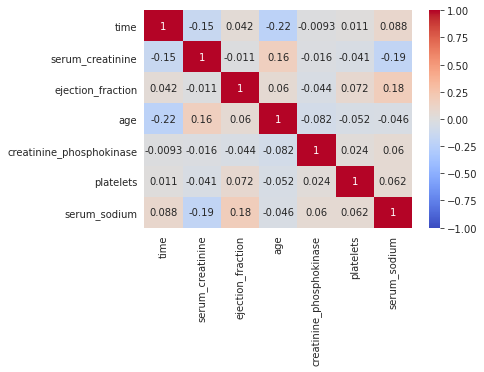

In [103]:
sns.heatmap(data_cm.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

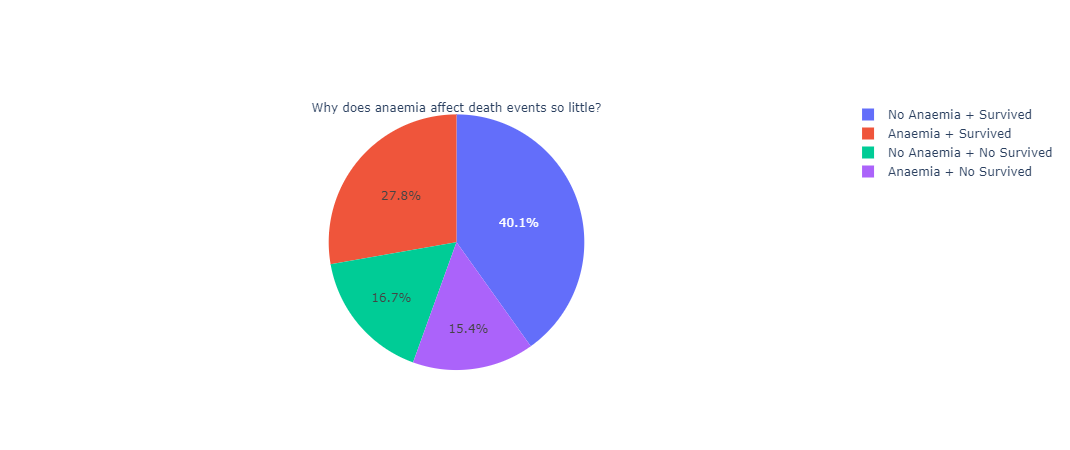

In [104]:
import plotly.graph_objects as go

anaemia = heart_failure_df[heart_failure_df["anaemia"]==1]
no_anaemia = heart_failure_df[heart_failure_df["anaemia"]==0]

fig = go.Figure(go.Pie(
    title="Why does anaemia affect death events so little?",
    values=[len(anaemia[heart_failure_df["DEATH_EVENT"]==1]),
           len(anaemia[heart_failure_df["DEATH_EVENT"]==0]),
           len(no_anaemia[heart_failure_df["DEATH_EVENT"]==1]),
           len(no_anaemia[heart_failure_df["DEATH_EVENT"]==0])],
    labels=["Anaemia + No Survived",
          "Anaemia + Survived",
          "No Anaemia + No Survived",
          "No Anaemia + Survived"],
    hovertemplate = "%{label}: <br>Rate: %{percent} </br> %{text}"
))

fig.show()

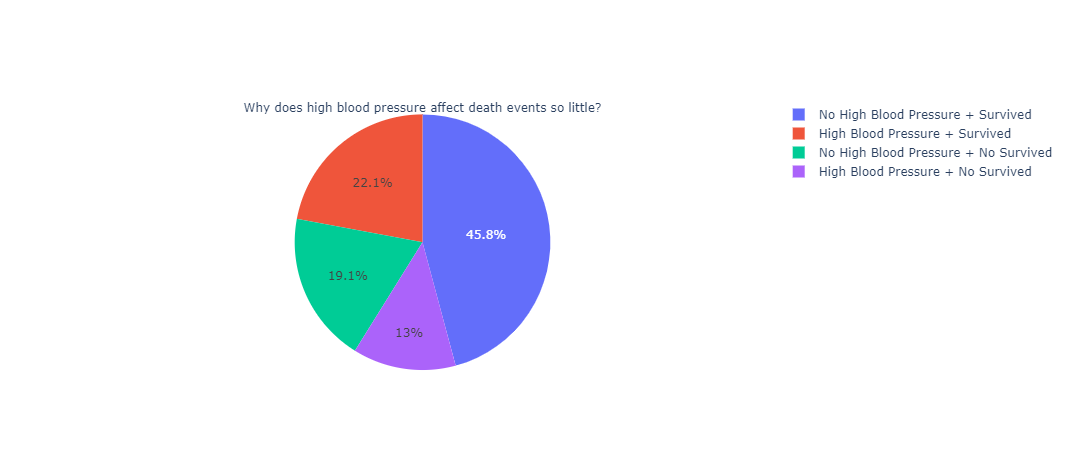

In [105]:
import plotly.graph_objects as go

high_blood_pressure = heart_failure_df[heart_failure_df["high_blood_pressure"]==1]
no_high_blood_pressure = heart_failure_df[heart_failure_df["high_blood_pressure"]==0]

fig = go.Figure(go.Pie(
    title="Why does high blood pressure affect death events so little?",
    values=[len(high_blood_pressure[heart_failure_df["DEATH_EVENT"]==1]),
           len(high_blood_pressure[heart_failure_df["DEATH_EVENT"]==0]),
           len(no_high_blood_pressure[heart_failure_df["DEATH_EVENT"]==1]),
           len(no_high_blood_pressure[heart_failure_df["DEATH_EVENT"]==0])],
    labels=["High Blood Pressure + No Survived",
          "High Blood Pressure + Survived",
          "No High Blood Pressure + No Survived",
          "No High Blood Pressure + Survived"],
    hovertemplate = "%{label}: <br>Rate: %{percent} </br> %{text}"
))

fig.show()

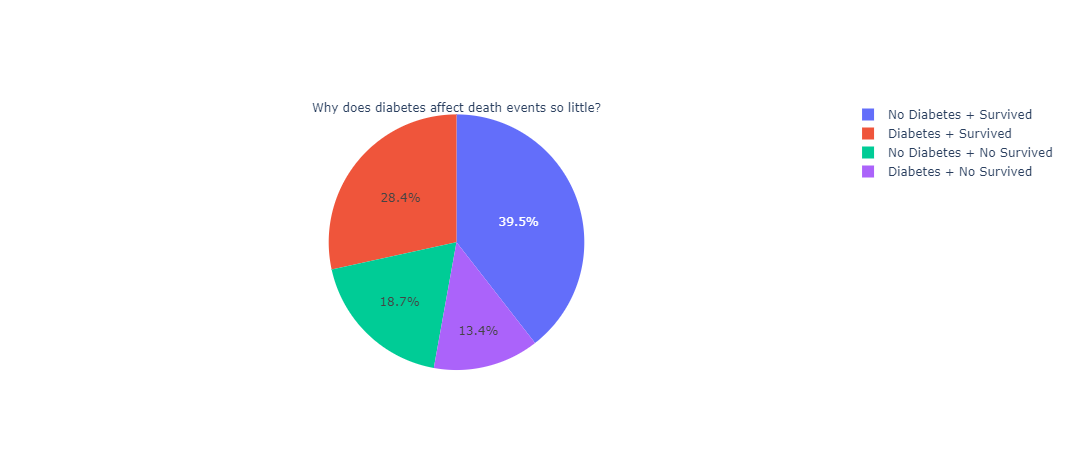

In [106]:
import plotly.graph_objects as go

diabetes = heart_failure_df[heart_failure_df["diabetes"]==1]
no_diabetes = heart_failure_df[heart_failure_df["diabetes"]==0]

fig = go.Figure(go.Pie(
    title="Why does diabetes affect death events so little?",
    values=[len(diabetes[heart_failure_df["DEATH_EVENT"]==1]),
           len(diabetes[heart_failure_df["DEATH_EVENT"]==0]),
           len(no_diabetes[heart_failure_df["DEATH_EVENT"]==1]),
           len(no_diabetes[heart_failure_df["DEATH_EVENT"]==0])],
    labels=["Diabetes + No Survived",
          "Diabetes + Survived",
          "No Diabetes + No Survived",
          "No Diabetes + Survived"],
    hovertemplate = "%{label}: <br>Rate: %{percent} </br> %{text}"
))

fig.show()

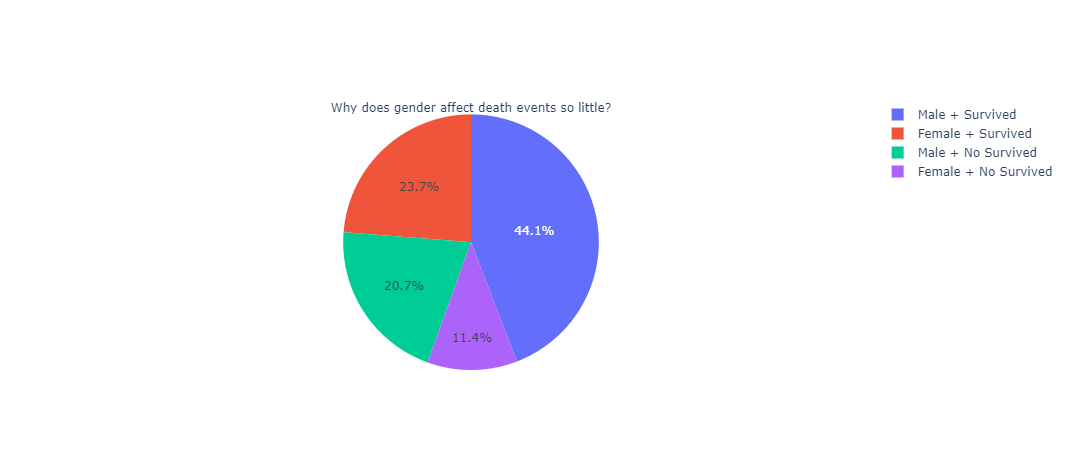

In [107]:
import plotly.graph_objects as go

male = heart_failure_df[heart_failure_df["sex"]==1]
female = heart_failure_df[heart_failure_df["sex"]==0]

fig = go.Figure(go.Pie(
    title="Why does gender affect death events so little?",
    values=[len(male[heart_failure_df["DEATH_EVENT"]==1]),
           len(male[heart_failure_df["DEATH_EVENT"]==0]),
           len(female[heart_failure_df["DEATH_EVENT"]==1]),
           len(female[heart_failure_df["DEATH_EVENT"]==0])],
    labels=["Male + No Survived",
          "Male + Survived",
          "Female + No Survived",
          "Female + Survived"],
    hovertemplate = "%{label}: <br>Rate: %{percent} </br> %{text}"
))

fig.show()

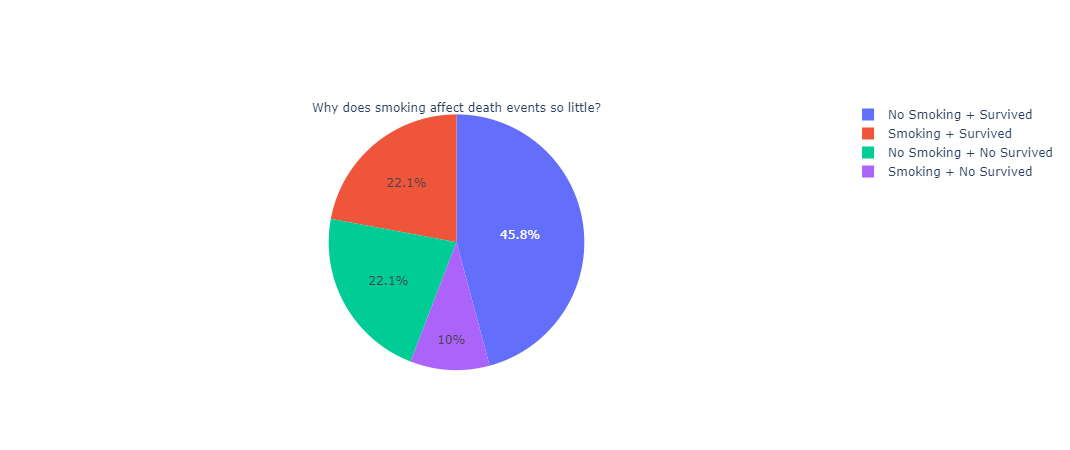

In [108]:
import plotly.graph_objects as go

smoking = heart_failure_df[heart_failure_df["smoking"]==1]
no_smoking = heart_failure_df[heart_failure_df["smoking"]==0]

fig = go.Figure(go.Pie(
    title="Why does smoking affect death events so little?", 
    values=[len(smoking[heart_failure_df["DEATH_EVENT"]==1]),
           len(smoking[heart_failure_df["DEATH_EVENT"]==0]),
           len(no_smoking[heart_failure_df["DEATH_EVENT"]==1]),
           len(no_smoking[heart_failure_df["DEATH_EVENT"]==0])],
    labels=["Smoking + No Survived",
          "Smoking + Survived",
          "No Smoking + No Survived",
          "No Smoking + Survived"],
    hovertemplate = "%{label}: <br>Rate: %{percent} </br> %{text}"
))

fig.show()

When I look at all the results, even if none of above features are present in the patient, it does not affect the death event because the patient's survival rate is higher.


# **Inferences and Conclusion**

* First I tried to understand datasets which feature have what properties. Some contain only boolean values while others contain continuous values. After that, I determined the feature importance by using Light GBM algorithm. According to this result, the important features are quite different what I expected. So, I examined the data analysis by using Plotly, seaborn library. End of the exploration, I realized that the feature importance histogram of this dataset matches the exploratory data analysis results.

* In the part of the question, I asked different questions by dividing two part which is questions about the most important and less important features of the dataset. I explained why these features are less important by drawing different graphs. Moreover, I examined these features relationship with age and gender. Then, I showed the final and best result why these features are less important for death events.

# **References and Future Work**

References:

* https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
* https://www.kaggle.com/sanchitakarmakar/heart-failure-prediction-visualization
* https://www.kaggle.com/isaienkov/data-visualization-modeling-82-acc-75-f1
* https://www.kaggle.com/nayansakhiya/heart-fail-analysis-and-quick-prediction-96-rate
* https://plotly.com/python/hover-text-and-formatting/
* https://plotly.com/python/creating-and-updating-figures/
* https://plotly.com/python/figure-labels/
* https://stackoverflow.com/questions/59993512/plotly-sunburst-typeerror-sunburst-got-an-unexpected-keyword-argument-path
* https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1

Future Work

* At first glance, we think to research the conditions under which the most influential features can override other factors. For example, we dropped that high blood pressure is definitely a high correlation with the heart, but we realized that it is a feature that needs much less attention than the result here. we would like to research this.
* we would like to see what impact this could have across the country, not just on the patient basis. We would like to observe if different geographies change this result.